# Matplotlib

## Устанавливаем библиотеку

Для установки библиотеки `matplotlib` необходимо использовать команду:
```
pip install matplotlib
```

## Проверяем доступность библиотеки

In [1]:
try:
    import matplotlib
    print("Версия библиотеки:", matplotlib.__version__)
except:
    print("Библиотека matplotlib недоступна.")
    print("Установите ее при помощи команды 'pip install matplotlib'")

Версия библиотеки: 3.7.2


## Особенности библиотеки matplotlib

### Измерение размеров в дюймах

Некоторые параметры измеряются в дюймах, и для работы с сантиметрами создадим функцию преобразования сантиметров в дюймы:

In [2]:
def cm_to_inch(cm: int|float) -> float:
    return cm/2.54

## Установка глобальных констант

Установим переменную для управления качеством графиков:

In [3]:
DPI = 100

Установим размер текста

In [4]:
FONT_SIZE = 14

## Matplotlib на простых примерах

Для начала практики построим параболу.

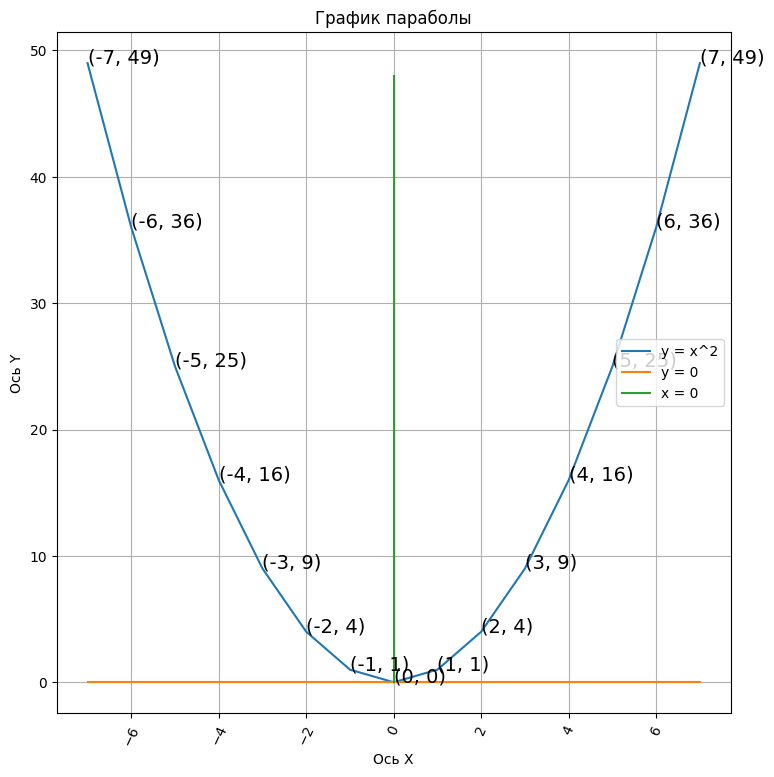

In [5]:
import matplotlib.pyplot as plt

# Устанавливаем размеры графика (x, y) и dpi графика
plt.figure(figsize=(
    cm_to_inch(20),
    cm_to_inch(20)),
    dpi=DPI)
# Создаем подпись к графику
# label - название графика
# fontdict - словарь с настройками отображения текста
plt.title(label="График параболы",
          fontdict={
              "horizontalalignment": "center",
          })
# Настраиваем подпись для осей X и Y
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
# Для лучшего отображения подписи по оси X 
# поворачиваем надпись на угол присвоенный rotation
plt.xticks(rotation=65)
# Включаем отображение сетки
plt.grid()
# Указываем количество значений, используемых на графике
number_of_values = 15
# Сдвиг оси относительно края графика
# Если сдвига нет, график будет строится только в положительной области x
axis_shift = int(number_of_values/2)

# Задаем функцию для параболы
y_of_x = lambda x: x**2
# Указываем значения x
x = [i for i in range(0-axis_shift, number_of_values-axis_shift)]
# Вычисляем значения y
y = [y_of_x(x_i) for x_i in x]

# Задаем значения для графика: сначала указываем массив x, затем массив y
# после присваиваем label формулу для легенды графика
plt.plot(x, 
         y,
         label=r'y = x^2')
# Проводим аналогичные действия для отрисовки оси абсцисс (y=0)
plt.plot(x, 
         [0 for i in range(number_of_values)],
         label=r'y = 0')
# Проводим аналогичные действия для отрисовки оси ординат (x=0)
plt.plot(
        [0 for i in range(y[-1])], 
        [i for i in range(y[-1])],
        label=r'x = 0')

# Добавляем легенду на график
plt.legend()

# Подготавливаем данные для точек графика
xy = zip(x, y)
# Добавляем указание точек (текст) на график
for x_item, y_item in xy:
    plt.text(x_item, y_item, f"({x_item}, {y_item})", fontsize=FONT_SIZE)

# Устанавливаем автоматические размеры, чтобы график полностью помещался в окно
plt.tight_layout()

# Сохраняем изображение
plt.savefig('media/matplotlib/first_graph.jpg')
# Отображаем построенный график
plt.show()